### Notebook for Supplementary Figure 2

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sceptre as spt # for plotting options

In [2]:
# create result folder
res_dir = '../results/booster_only/'
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

In [3]:
prot = pd.read_table('../data/booster_only/celltype_booster_only_Proteins.txt')

In [4]:
# only use Abundances of F1
prot = prot[prot.columns[prot.columns.str.contains('Abundances Grouped F1')]]
prot = prot.dropna(how='all')
prot.columns = [x.split(' ')[-1] for x in prot.columns]

In [5]:
num_vals = (~prot.isna()).sum()
prot.columns = [x + '\n' + str(num_vals[x]) for x in prot.columns]

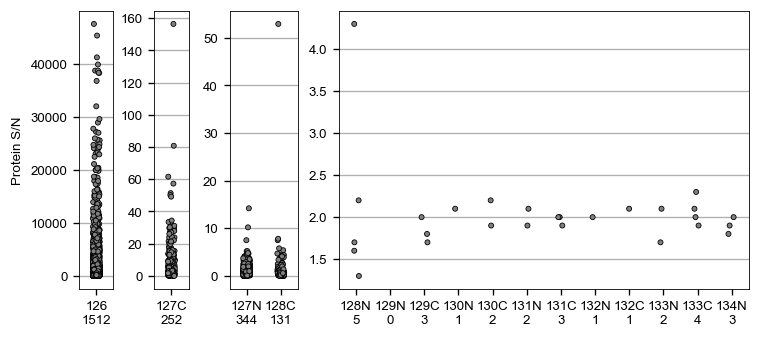

In [6]:
gs_kw = dict(width_ratios=[1, 1, 2, 12], wspace=0.3)
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(7.2, 3), gridspec_kw=gs_kw)
sns.stripplot(data=prot.iloc[:, [0]], color='grey', edgecolor='black', linewidth=0.5, size=3, ax=axs[0])
axs[0].grid(axis='y')
axs[0].set_ylabel('Protein S/N')
sns.stripplot(data=prot.iloc[:, [2]], color='grey', edgecolor='black', linewidth=0.5, size=3, ax=axs[1])
axs[1].grid(axis='y')
sns.stripplot(data=prot.iloc[:, [1, 4]], color='grey', edgecolor='black', linewidth=0.5, size=3, ax=axs[2])
axs[2].grid(axis='y')
sns.stripplot(data=prot.iloc[:, [3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]], color='grey', edgecolor='black', linewidth=0.5, size=3, ax=axs[3])
axs[3].grid(axis='y')
plt.savefig(res_dir + 'booster_only.pdf', bbox_inches='tight', transparent=True)

In [7]:
os.system('jupyter nbconvert --to html booster_only.ipynb --output-dir={}'.format(res_dir))

0